In [311]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# If the CSV file is in Google Drive
# df = pd.read_csv('/content/drive/MyDrive/path/to/your/file.csv')

# If the CSV file is uploaded directly to Colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG_Signal/p040337.csv')  # Replace 'file.csv' with the path to your CSV file
print(df.head())  # Display the first few rows of the DataFrame

sys = df['Mean_NBP_Sys'].values
dia = df['Mean_NBP_Dias'].values

print(sys, ' / ', dia)

columns_to_remove = ['Mean_NBP_Sys', 'Mean_NBP_Dias']
cleaned_df = df.drop(columns=columns_to_remove)

print(cleaned_df.head())

          0        1         2        3         4        5        6        7  \
0  0.164223  0.16129  0.159335  0.15738  0.155425  0.15347  0.15347  0.15347   

          8         9  ...      4192      4193      4194      4195      4196  \
0  0.152493  0.151515  ...  0.134897  0.134897  0.134897  0.134897  0.134897   

      4197     4198     4199  Mean_NBP_Sys  Mean_NBP_Dias  
0  0.13392  0.13392  0.13392      96.57247           44.0  

[1 rows x 4202 columns]
[96.57246987]  /  [44.]
          0        1         2        3         4        5        6        7  \
0  0.164223  0.16129  0.159335  0.15738  0.155425  0.15347  0.15347  0.15347   

          8         9  ...      4190     4191      4192      4193      4194  \
0  0.152493  0.151515  ...  0.134897  0.13392  0.134897  0.134897  0.134897   

       4195      4196     4197     4198     4199  
0  0.134897  0.134897  0.13392  0.13392  0.13392  

[1 rows x 4200 columns]


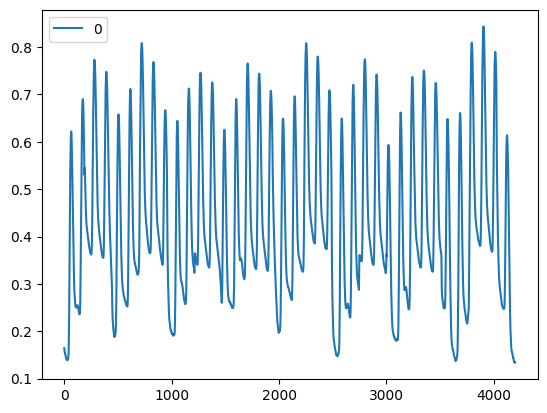

In [312]:
# Transpose the DataFrame
transposed_df = cleaned_df.T

# Plot a line graph of the transposed DataFrame
transposed_df.plot(kind='line')

# Display the plot
plt.show()

In [313]:
def find_peaks_in_data(data):
    """
    Find peaks in the data and plot them.

    Parameters:
    - data: DataFrame or Series with one row or transposed DataFrame

    Returns:
    - peaks: Dictionary containing indices and corresponding values of peaks
    """
    # Convert DataFrame or Series to numpy array
    values = data.values.flatten() if isinstance(data, pd.DataFrame) else data.values

    # Find peaks in the data
    peaks, _ = find_peaks(values)

    # Plot the data and highlight the peaks
    plt.plot(values, label='Data')
    plt.plot(peaks, values[peaks], 'ro', label='Peaks')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Peaks in Data')
    plt.legend()
    plt.show()

    # Return peaks as a dictionary containing indices and corresponding values
    peaks_dict = {'indices': peaks, 'values': values[peaks]}

    # Create a DataFrame containing peak values
    peak_values_df = pd.DataFrame({'Index': peaks, 'Value': values[peaks]})

    return peaks_dict, peak_values_df

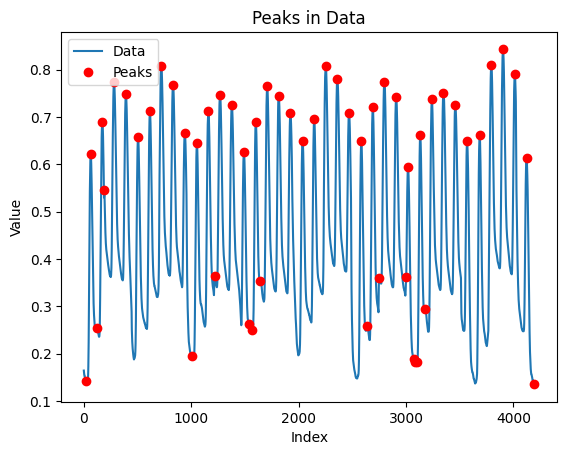

{'indices': array([  20,   64,  122,  172,  190,  280,  391,  505,  616,  721,  830,
        941, 1006, 1053, 1160, 1217, 1269, 1377, 1491, 1540, 1567, 1601,
       1645, 1708, 1815, 1923, 2037, 2145, 2253, 2360, 2469, 2584, 2639,
       2691, 2750, 2799, 2908, 3000, 3019, 3071, 3084, 3098, 3133, 3180,
       3241, 3349, 3459, 3569, 3686, 3794, 3904, 4013, 4123, 4194]), 'values': array([0.1427175 , 0.62170088, 0.25513196, 0.69012708, 0.54545455,
       0.77321603, 0.74780059, 0.65786901, 0.71163245, 0.80840665,
       0.76832845, 0.66666667, 0.19550342, 0.64418377, 0.71260997,
       0.36461388, 0.74584555, 0.72531769, 0.62561095, 0.2629521 ,
       0.25024438, 0.69012708, 0.35386119, 0.76539589, 0.74389052,
       0.70772239, 0.64907136, 0.69599218, 0.80840665, 0.78005865,
       0.7086999 , 0.64907136, 0.25806452, 0.72043011, 0.36070381,
       0.77419355, 0.74193548, 0.36168133, 0.59335288, 0.18963832,
       0.1827957 , 0.1827957 , 0.66177908, 0.29325513, 0.7370479 ,
       0.75073

In [314]:
peaks, peak_values_df = find_peaks_in_data(transposed_df)
print(peaks)
print(peak_values_df)

In [316]:
def split_values_high_low(filtered_df, threshold=0.5):
    """
    Split values in filtered_df into two arrays based on the specified threshold for high values.

    Parameters:
    - filtered_df: DataFrame containing filtered values
    - threshold: float, minimum value required to be considered as high (default: 0.6)

    Returns:
    - high_values: list of high values (greater than or equal to threshold)
    - low_values: list of low values (less than threshold)
    """
    high_values = []
    low_values = []

    for value in filtered_df['Value']:
        if value >= threshold:
            high_values.append(value)
            low_values.append(None)  # Placeholder for low value
        else:
            high_values.append(None)  # Placeholder for high value
            low_values.append(value)

    return high_values, low_values



high_values, low_values = split_values_high_low(peak_values_df)
print(high_values)
print(low_values)


[None, 0.6217008797653959, None, 0.6901270772238515, 0.5454545454545454, 0.7732160312805474, 0.7478005865102639, 0.6578690127077224, 0.7116324535679375, 0.8084066471163245, 0.7683284457478006, 0.6666666666666666, None, 0.6441837732160313, 0.7126099706744868, None, 0.7458455522971652, 0.7253176930596286, 0.6256109481915934, None, None, 0.6901270772238515, None, 0.7653958944281525, 0.7438905180840665, 0.70772238514174, 0.6490713587487781, 0.6959921798631477, 0.8084066471163245, 0.7800586510263929, 0.7086999022482894, 0.6490713587487781, None, 0.7204301075268817, None, 0.7741935483870968, 0.7419354838709677, None, 0.5933528836754643, None, None, None, 0.6617790811339198, None, 0.7370478983382209, 0.750733137829912, 0.7243401759530792, 0.6480938416422287, 0.6608015640273704, 0.8093841642228738, 0.8435972629521017, 0.7898338220918866, 0.613880742913001, None]
[0.1427174975562072, None, 0.2551319648093841, None, None, None, None, None, None, None, None, None, 0.1955034213098729, None, None, 

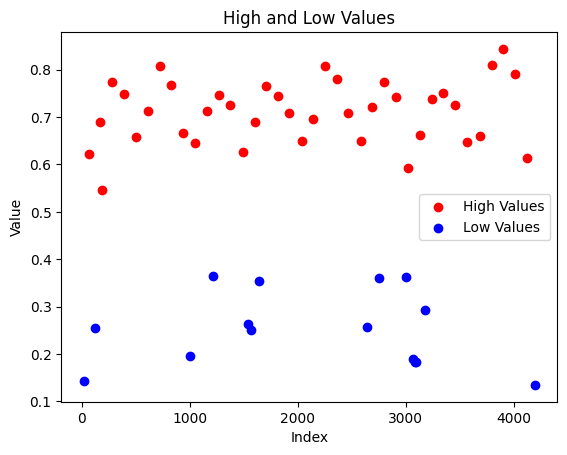

In [317]:
# Plot high values
plt.scatter(peak_values_df['Index'], high_values, color='red', label='High Values')

# Plot low values
plt.scatter(peak_values_df['Index'], low_values, color='blue', label='Low Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('High and Low Values')
plt.legend()

# Show plot
plt.show()


In [318]:
# Calculate the average of high values
average_high = np.mean([value for value in high_values if value is not None])

# Calculate the average of low values
average_low = np.mean([value for value in low_values if value is not None])

print("Average High Value:", average_high)
print("Average Low Value:", average_low)



Average High Value: 0.7105797428378073
Average Low Value: 0.2525904203323558
